# Cluster Exercice

> Enzo Sergiani


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import SpectralClustering
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense

In [14]:
df = pd.read_csv("./data/exam_data.csv", decimal=".")

df.head()

,X,Y
0,6.776043,2.161305
1,7.537688,8.778988
2,17.667300,6.899375
3,17.049413,7.418676
4,6.589132,2.978855


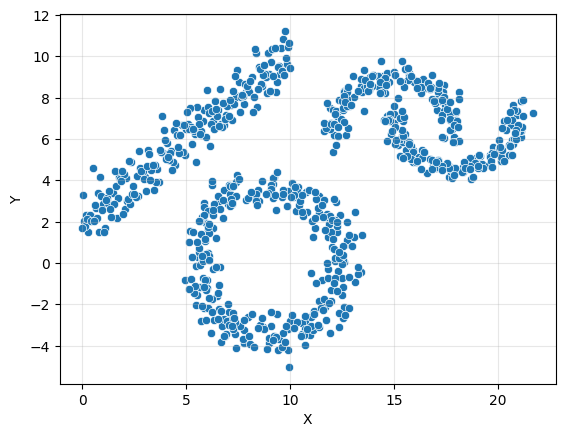

In [15]:
sns.scatterplot(data=df, x="X", y="Y")
plt.grid(alpha=0.3)
plt.show()

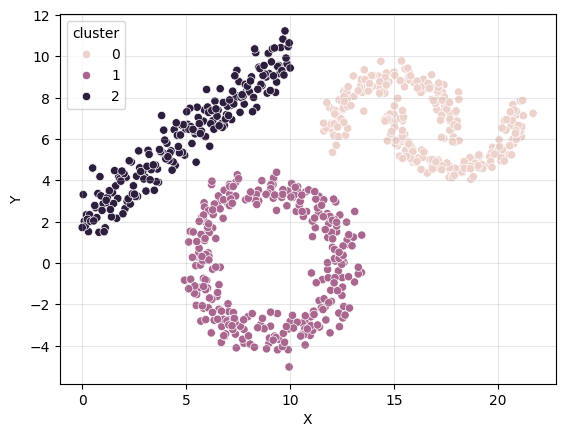

In [16]:
spectral = SpectralClustering(n_clusters=3)
df["cluster"] = spectral.fit_predict(df[["X", "Y"]])

sns.scatterplot(data=df, x="X", y="Y", hue="cluster")
plt.grid(alpha=0.3)
plt.show()

Mean Squared Error: 0.5142929365940165
Intercept: 2.011852175566374
Coefficient: 0.8093540710663473


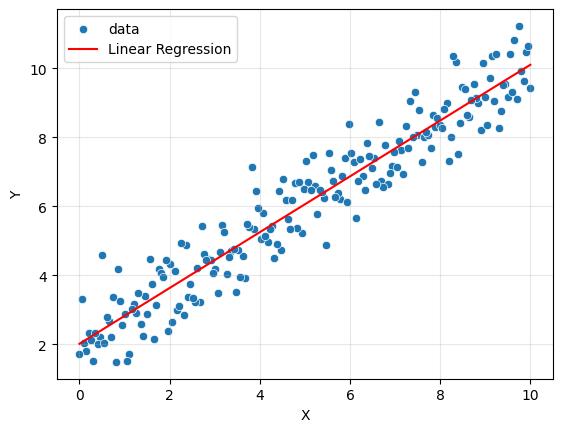

In [17]:
from sklearn.metrics import mean_squared_error

# Select cluster 0
cluster_0 = df[df["cluster"] == 2].copy()

linear_model = LinearRegression()
linear_model.fit(cluster_0[["X"]], cluster_0["Y"])

cluster_0.loc[:, "Y_pred"] = linear_model.predict(cluster_0[["X"]])

mse = mean_squared_error(cluster_0["Y"], cluster_0["Y_pred"])
print(f"Mean Squared Error: {mse}")

print(f"Intercept: {linear_model.intercept_}")
print(f"Coefficient: {linear_model.coef_[0]}")

sns.scatterplot(data=cluster_0, x="X", y="Y", label="data")
sns.lineplot(data=cluster_0, x="X", y="Y_pred", color="red", label="Linear Regression")
plt.grid(alpha=0.3)
plt.show()

In [18]:
train_data, eval_data = train_test_split(df, test_size=0.4, random_state=42)

print("Training data class distribution:")
print(train_data["cluster"].value_counts())
print("\n")
print(f"Training data size: {len(train_data)}")
print(f"Evaluation data size: {len(eval_data)}")

print("Evaluation data class distribution:")
print(eval_data["cluster"].value_counts())

Training data class distribution:
cluster
1    179
0    179
2    122
Name: count, dtype: int64


Training data size: 480
Evaluation data size: 320
Evaluation data class distribution:
cluster
0    121
1    121
2     78
Name: count, dtype: int64


In [19]:
model = Sequential()
model.add(Input(shape=(2,)))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(3, activation="softmax"))

model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,371 (9.26 KB)

 Trainable params: 2,371 (9.26 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = model.fit(
    train_data[["X", "Y"]],
    train_data["cluster"],
    epochs=100,
    validation_split=0.2,
    verbose=0,
)

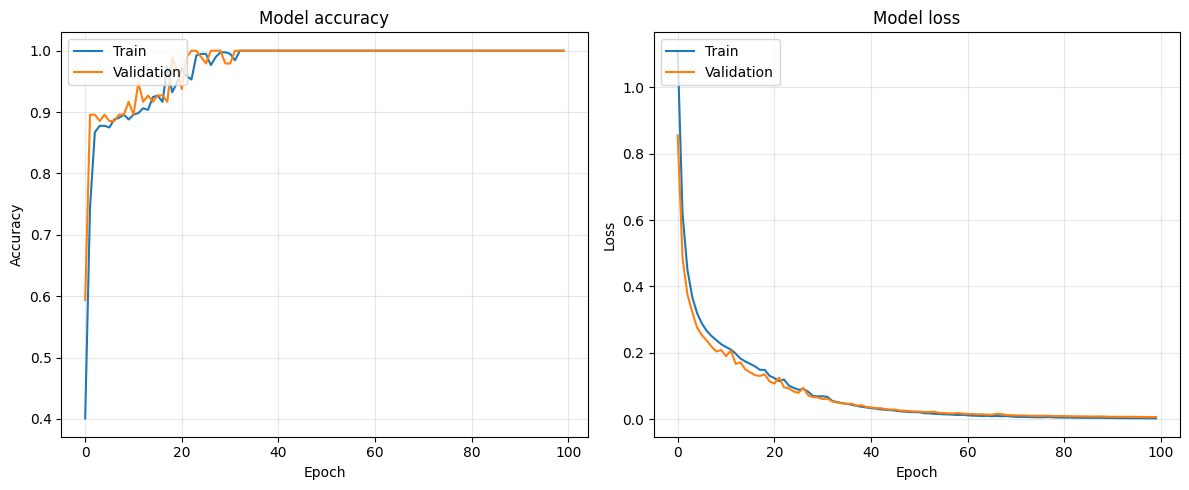

In [21]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

33818/33818 ━━━━━━━━━━━━━━━━━━━━ 30s 885us/step


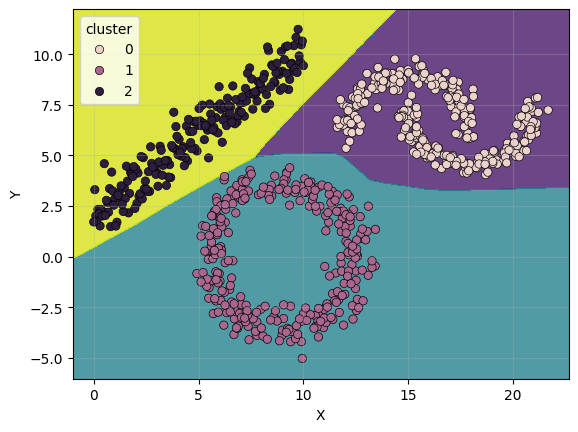

In [24]:
X = df[["X", "Y"]].values

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
sns.scatterplot(data=df, x="X", y="Y", hue="cluster", edgecolor="k")
plt.grid(alpha=0.3)
plt.show()

In [31]:
input_layer = Input(shape=(1,))

hidden_layer = Dense(1, activation="relu")(input_layer)

output_layer = Dense(1, activation="linear")(hidden_layer)

autoencoder = Model(inputs=input_layer, outputs=output_layer)

autoencoder.compile(optimizer="adam", loss="mean_squared_error")

autoencoder.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

In [32]:
autoencoder.fit(
    cluster_0[["X"]],
    cluster_0["Y"],
    epochs=100,
    batch_size=10,
    validation_split=0.2,
    verbose=0,
)

In [34]:
weights = model.get_weights()

print(f"Number of weights: {len(weights)}")

Number of weights: 6
